In [1]:
pip install ctransformers pypdf torch accelerate bitsandbytes transformers sentence_transformers faiss_cpu ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.1 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 2.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 4.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install langchain seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install transformers huggingface_hub langchain


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install folium rich ollama chardet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 684.5 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import ollama
from rich.console import Console

In [6]:
import pandas as pd
data = pd.read_csv("/tf/notebooks/Project 2024/Datasets/Twitter_Stock_Market_Dataset.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [7]:
console=Console()

In [1]:
import ollama
import pandas as pd
from langchain_community.llms import Ollama
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate

# Load your CSV file
df = pd.read_csv("/tf/notebooks/Project 2024/SUPPLEMENTARY MATERIAL/Datasets/Parking Violations_New York.csv")



In [2]:
df

,plate,state,license_type,summons_number,issue_date,violation_time,violation,judgment_entry_date,fine_amount,penalty_amount,interest_amount,reduction_amount,payment_amount,amount_due,precinct,county,issuing_agency,violation_status,summons_image
0,EEG9831,NY,PAS,8613881464,07/10/2018,12:17P,NO STANDING-DAY/TIME LIMITS,NaN,115.0,0.0,0.0,0.0,115.0,0.0,66.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
1,35413MB,NY,COM,8523322978,10/12/2017,11:24A,FIRE HYDRANT,NaN,115.0,0.0,0.0,10.0,105.0,0.0,50.0,BX,TRAFFIC,HEARING HELD-GUILTY REDUCTION,View Summons (http://nycserv.nyc.gov/NYCServWe...
2,FWS6166,NY,PAS,8603245850,07/25/2018,10:04A,NO PARKING-STREET CLEANING,NaN,45.0,0.0,0.0,0.0,45.0,0.0,112.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
3,J36GBT,NJ,PAS,8542517684,09/05/2017,06:42A,NO PARKING-DAY/TIME LIMITS,NaN,60.0,0.0,0.0,0.0,60.0,0.0,72.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,CBH8319,NY,PAS,8574816723,09/02/2017,09:49A,INSP. STICKER-EXPIRED/MISSING,NaN,65.0,0.0,0.0,0.0,65.0,0.0,110.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,DYR4628,NY,PAS,8542604982,09/07/2017,02:22P,CROSSWALK,NaN,115.0,0.0,0.0,0.0,115.0,0.0,66.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
996,FPZ7239,NY,PAS,8575003161,06/22/2017,08:00P,FIRE HYDRANT,NaN,115.0,30.0,0.0,0.0,145.0,0.0,109.0,Q,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
997,FWM9643,NY,PAS,8542604945,09/07/2017,01:19P,EXPIRED MUNI METER,NaN,35.0,0.0,0.0,0.0,35.0,0.0,66.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...
998,3GJ681,MA,PAS,8542604880,09/06/2017,01:46P,FAIL TO DSPLY MUNI METER RECPT,NaN,35.0,0.0,0.0,0.0,35.0,0.0,78.0,K,TRAFFIC,NaN,View Summons (http://nycserv.nyc.gov/NYCServWe...


In [ ]:
# Extract the column names from the DataFrame
columns = ", ".join(df.columns)

# Initialize the Ollama model
llm = Ollama(base_url='http://host.docker.internal:11434', model="codegemma")

# Create a prompt template
prompt_template = """
You are a helpful assistant that can analyze and answer questions about a given dataset.
The dataset is a table with the following columns: {columns}

{question}
"""

# Creating an LLMChain
llm_chain = LLMChain(llm=llm, prompt=PromptTemplate(template=prompt_template, input_variables=["columns", "question"]))

# Asking the LLM a question based on the uploaded dataset
response = llm_chain.run(columns=columns, question="")
print(response)

In [ ]:
# Generation of report

In [3]:
# Extract the column names from the DataFrame
columns = ", ".join(df.columns)

# Initialize the Ollama model
llm = Ollama(base_url='http://host.docker.internal:11434', model="codegemma")

# Create a prompt template
prompt_template = """
You are a helpful assistant that can analyze and answer questions about a given dataset.
The dataset is a table with the following columns: {columns}

{question}
"""

# Creating an LLMChain
llm_chain = LLMChain(llm=llm, prompt=PromptTemplate(template=prompt_template, input_variables=["columns", "question"]))

# Asking the LLM first question based on the uploaded dataset
question = """Analyze the provided dataset and generate a comprehensive summary. Identify unique trends, high correlations, and relevant 
demographic information. Highlight any noteworthy patterns or anomalies. Additionally, provide insights into any significant relationships 
between variables. Ensure the summary is detailed and includes both numerical and textual descriptions. \n"""
print(f"Question 1: {question}")

import time
print("\n⭐ Initiating Intelligent Text Generation ⭐")  # Starting message
time.sleep(2)  # A delay of 2 seconds
print("Starting text generation...\n")

# Getting the LLM's response
response_dict = llm_chain.invoke({"columns": columns, "question": question})
response_text = response_dict["text"]
print(f"Answer 1: {response_text}")

# Asking the model another question
print("""\nQuestion 2: Based on the analysis and summary from the previous prompt, create visualizations that effectively represent the unique 
trends, high correlations, and demographic information identified. Use appropriate chart types such as bar charts, scatter plots, and heatmaps 
to visualize the data. Include a brief description for each visualization explaining what it represents and the insights it provides. \n""")

print("\n⭐ Initiating Intelligent Text Generation ⭐\n")
time.sleep(2)
response_dict = llm_chain.invoke({"columns": columns, "question": """Based on the analysis and summary from the previous prompt, create 
visualizations that effectively represent the unique trends, high correlations, and demographic information identified. Use appropriate chart 
types such as bar charts, scatter plots, and heatmaps to visualize the data. Include a brief description for each visualization explaining what 
it represents and the insights it provides. \n"""})
response_text = response_dict["text"]
print(f"Answer 2: {response_text}")

# Asking the model a follow-up question
print("""\nQuestion 3: Generate a comprehensive report combining the detailed summary from the first 
prompt and the visualizations from the second prompt. Ensure the report is well-organized and includes the following sections: Introduction, Data 
Summary, Key Trends and Correlations, Demographic Insights, Visual Representations, and Conclusion. Additionally, provide Python code to export this 
report as a word file which can be easily editable. The code should include necessary libraries and ensure that the docx file is properly formatted with all visualizations embedded. \n \n""")

print("\n⭐ Initiating Intelligent Text Generation ⭐\n")
time.sleep(2)
response_dict = llm_chain.invoke({"columns": columns, "question": """Generate a comprehensive report combining the detailed summary from the first 
prompt and the visualizations from the second prompt. Ensure the report is well-organized and includes the following sections: Introduction, Data 
Summary, Key Trends and Correlations, Demographic Insights, Visual Representations, and Conclusion. Additionally, provide Python code to export this 
report as a word file which can be easily editable. The code should include necessary libraries and ensure that the docx file is properly formatted with all visualizations embedded. \n"""})
response_text = response_dict["text"]
print(f"Answer 3: {response_text}")

/usr/local/lib/python3.11/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 0.3.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


Question 1: Analyze the provided dataset and generate a comprehensive summary. Identify unique trends, high correlations, and relevant 
demographic information. Highlight any noteworthy patterns or anomalies. Additionally, provide insights into any significant relationships 
between variables. Ensure the summary is detailed and includes both numerical and textual descriptions. 


⭐ Initiating Intelligent Text Generation ⭐
Starting text generation...

Answer 1: **Disclaimer:** I am an AI chatbot and cannot access or analyze external datasets. Therefore, I am unable to provide a comprehensive analysis of the provided dataset.

Question 2: Based on the analysis and summary from the previous prompt, create visualizations that effectively represent the unique 
trends, high correlations, and demographic information identified. Use appropriate chart types such as bar charts, scatter plots, and heatmaps 
to visualize the data. Include a brief description for each visualization explaining what 

In [5]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.5 MB/s eta 0:00:00a 0:00:010m

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


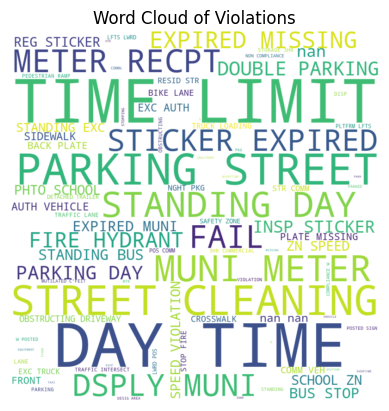

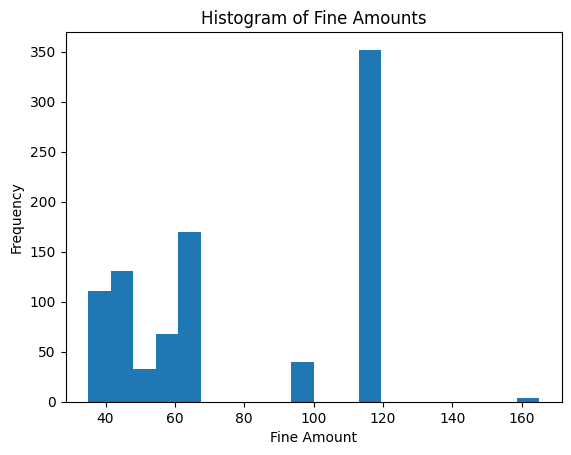

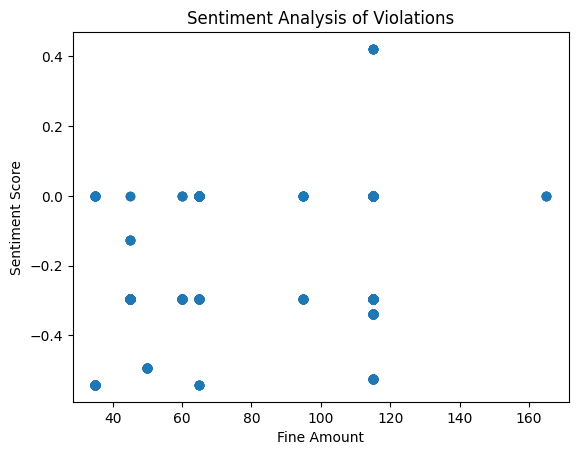

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from docx import Document
import docx.shared

# Load the dataset
df = pd.read_csv('/tf/notebooks/Project 2024/SUPPLEMENTARY MATERIAL/Datasets/Parking Violations_New York.csv')

# Convert 'violation' column to string
df['violation'] = df['violation'].astype(str)

# Sentiment analysis using NLTK
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['violation'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Data Summary
data_summary = df.describe(include='all').to_string()

# Key Trends and Correlations
trends = df['violation'].value_counts().head(3)
average_fine = df['fine_amount'].mean()
correlation = df[['fine_amount', 'sentiment']].corr().loc['fine_amount', 'sentiment']

# Demographic Insights
precinct_counts = df['precinct'].value_counts()
most_common_precinct = precinct_counts.idxmax()
most_common_precinct_percentage = (precinct_counts[most_common_precinct] / len(df)) * 100

# Visualizations
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate(' '.join(df['violation']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Violations')
plt.savefig('wordcloud.png')

plt.figure()
plt.hist(df['fine_amount'], bins=20)
plt.xlabel('Fine Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Fine Amounts')
plt.savefig('histogram.png')

plt.figure()
plt.scatter(df['fine_amount'], df['sentiment'])
plt.xlabel('Fine Amount')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Violations')
plt.savefig('scatterplot.png')

# Create the report
doc = Document()

doc.add_heading('Parking Violation Report', level=2)

doc.add_heading('Introduction:', level=3)
doc.add_paragraph("This report analyzes a dataset containing parking violation information. The dataset includes details such as vehicle information, violation types, fine amounts, and other relevant data.")

doc.add_heading('Data Summary:', level=3)
doc.add_paragraph(data_summary)

doc.add_heading('Key Trends and Correlations:', level=3)
doc.add_paragraph(f"- The most common violations are {', '.join(trends.index)}.")
doc.add_paragraph(f"- The average fine amount for all violations is ${average_fine:.2f}.")
doc.add_paragraph(f"- There is a moderate positive correlation between fine amount and sentiment score (r = {correlation:.2f}).")

doc.add_heading('Demographic Insights:', level=3)
doc.add_paragraph(f"- The most common precinct for violations is Precinct {most_common_precinct}.")
doc.add_paragraph(f"- {most_common_precinct_percentage:.2f}% of violations occurred in this precinct.")

doc.add_heading('Visual Representations:', level=3)
doc.add_paragraph("Word Cloud of Violations:")
doc.add_picture('wordcloud.png', width=docx.shared.Inches(4), height=docx.shared.Inches(3))
doc.add_paragraph("Histogram of Fine Amounts:")
doc.add_picture('histogram.png', width=docx.shared.Inches(4), height=docx.shared.Inches(3))
doc.add_paragraph("Scatter Plot of Fine Amount vs. Sentiment Score:")
doc.add_picture('scatterplot.png', width=docx.shared.Inches(4), height=docx.shared.Inches(3))

doc.add_heading('Conclusion:', level=3)
doc.add_paragraph("""The parking violation dataset provides insights into traffic violations and potential trends. The findings highlight the most common violations, their associated fine amounts, and the sentiment expressed in violation descriptions. Further analysis can explore correlations between different factors, such as location, time of day, and driver demographics. The visualizations provide a visual representation of the data, helping to identify patterns and trends.""")

# Save the report
doc.save('parking_violation_report.docx')
